Faça o acréscimo ao código da atividade anterior, explicando as seguintes centralidades:
- Degree (Grau)
- Closeness (Proximidade)
- Eigenvector (Autovetor)

Exemplos de perguntas a serem respondidas interpretando essas medidas:

- Qual é o vértice com maior concentração de caminhos?
- Qual vértice é mais próximo aos demais?
- Qual vértice concentra a maior importância? Por quê?
Obs.: Utilize o labirinto que modelou nas primeiras aulas.


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os dados do CSV
input_data = pd.read_csv('./Atividade/atividade result.CSV', index_col=0, sep=';')

# Criar o grafo
G = nx.Graph()

# Adicionar as arestas com pesos ao grafo, utilizando os índices do CSV diretamente
for i, row in input_data.iterrows():
    for j, weight in row.items():
        if weight != 0:  # Somente adicionar arestas com peso não zero
            G.add_edge(i, int(j), weight=weight)


[4, 7, 11, 16, 13]
{1: 0.0392156862745098, 2: 0.0392156862745098, 6: 0.0392156862745098, 3: 0.0392156862745098, 4: 0.058823529411764705, 5: 0.0392156862745098, 7: 0.058823529411764705, 8: 0.0392156862745098, 11: 0.058823529411764705, 9: 0.0392156862745098, 10: 0.0196078431372549, 12: 0.0392156862745098, 16: 0.058823529411764705, 13: 0.058823529411764705, 14: 0.0196078431372549, 15: 0.0196078431372549, 17: 0.0392156862745098, 21: 0.0392156862745098, 18: 0.0392156862745098, 19: 0.0392156862745098, 20: 0.0196078431372549, 22: 0.0392156862745098, 23: 0.058823529411764705, 24: 0.0392156862745098, 26: 0.0392156862745098, 25: 0.0196078431372549, 27: 0.0392156862745098, 28: 0.058823529411764705, 29: 0.058823529411764705, 32: 0.0392156862745098, 30: 0.0196078431372549, 31: 0.0196078431372549, 33: 0.058823529411764705, 34: 0.0392156862745098, 37: 0.0392156862745098, 35: 0.0392156862745098, 36: 0.0196078431372549, 38: 0.0392156862745098, 39: 0.0392156862745098, 40: 0.0392156862745098, 41: 0.05882

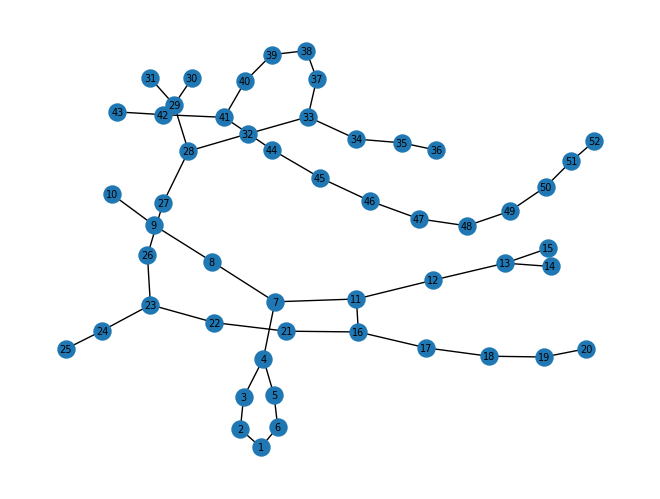

In [11]:

#!---------------------------- Calculating Degree Centrality ----------------------------
degreeCentrality = nx.degree_centrality(G)
degreeSorted = sorted(degreeCentrality, key=degreeCentrality.get, reverse=True) #ordenando por ordem decrescente
print(str(degreeSorted[:5])) # todo; mostrando o top 5 mais importante 
print(str(degreeCentrality))
#!----------------------------   ----------------------------   ----------------------------

# Desenhar o grafo (1 à 52)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=150, font_size=7)
plt.show()

### Explicando Centralidade de Grau

Com base no código acima, podemos observar que 'Degree Centrality' é relacionado diretamente à quantidade de conexões que um nó (node) tem diretas. Na primeira linha de 'print' podemos ver o top 5 de arestas importantes que tem conexões ([4, 7, 11, 16, 13]) que, observando o gráfico, podemos notar que tem 3 conexões todas essas arestas.

[11, 7, 4, 16, 12]
[(1, '0.11'), (2, '0.13'), (3, '0.20'), (4, '0.35'), (5, '0.20'), (6, '0.13'), (7, '0.42'), (8, '0.23'), (9, '0.12'), (10, '0.05'), (11, '0.42'), (12, '0.25'), (13, '0.16'), (14, '0.07'), (15, '0.07'), (16, '0.34'), (17, '0.18'), (18, '0.10'), (19, '0.05'), (20, '0.02'), (21, '0.19'), (22, '0.12'), (23, '0.10'), (24, '0.05'), (25, '0.02'), (26, '0.06'), (27, '0.04'), (28, '0.04'), (29, '0.02'), (30, '0.01'), (31, '0.01'), (32, '0.02'), (33, '0.02'), (34, '0.01'), (35, '0.00'), (36, '0.00'), (37, '0.01'), (38, '0.01'), (39, '0.00'), (40, '0.00'), (41, '0.00'), (42, '0.00'), (43, '0.00'), (44, '0.00'), (45, '0.00'), (46, '0.00'), (47, '0.00'), (48, '0.00'), (49, '0.00'), (50, '0.00'), (51, '0.00'), (52, '0.00')]


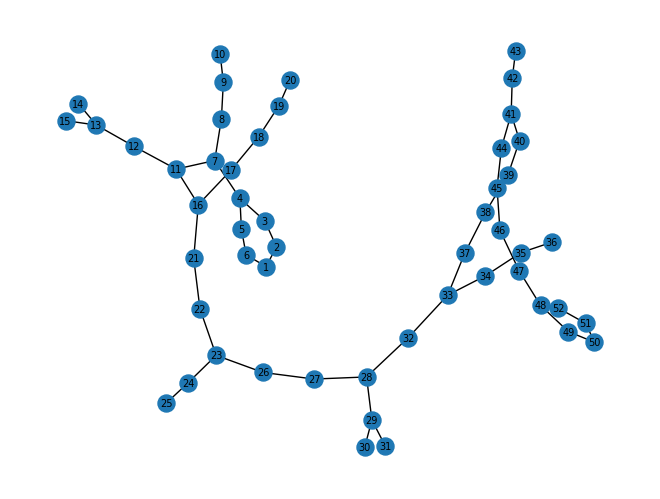

In [18]:
#!---------------------------- Calculating Eigenvector Centrality ----------------------------

centrality = nx.eigenvector_centrality(G, max_iter=200)
sortedCentrality = sorted((v, f"{c:0.2f}") for v, c in centrality.items())

degreeSorted = sorted(centrality, key=centrality.get, reverse=True) #ordenando por ordem decrescente
print(str(degreeSorted[:5])) # todo; mostrando o top 5 mais importante 
print(sortedCentrality)
#!----------------------------   ----------------------------   ----------------------------

# Desenhar o grafo (1 à 52)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=150, font_size=7)
plt.show()

### Explicando Centralidade de Autovetor (Eigenvector Centrality)

Em 'Eigenvector Centrality' é a centralidade que mede a quantidade de conexões de um nó com outros nós importantes, ou seja, a quantidade de conexões com nós que tem outras bastantes conexões. Na primeira linha printada podemos ver o top 5 deste algorítmo ([11, 7, 4, 16, 12]), onde podemos observar o nó 11 por exemplo, que conecta com 3 ramificações que podem ser consideiradas subgrafos, onde ele se conecta com o nó 7 e 16 que fazem 3 conexões e que por sinal, estão no top 5 do algorítmo anterior (Degree Centrality)

[26, 27, 23, 28, 22]
[(1, '0.080'), (2, '0.086'), (3, '0.093'), (4, '0.101'), (5, '0.093'), (6, '0.086'), (7, '0.110'), (8, '0.100'), (9, '0.092'), (10, '0.084'), (11, '0.118'), (12, '0.107'), (13, '0.098'), (14, '0.089'), (15, '0.089'), (16, '0.125'), (17, '0.113'), (18, '0.102'), (19, '0.093'), (20, '0.085'), (21, '0.128'), (22, '0.132'), (23, '0.135'), (24, '0.119'), (25, '0.107'), (26, '0.135'), (27, '0.135'), (28, '0.135'), (29, '0.120'), (30, '0.107'), (31, '0.107'), (32, '0.131'), (33, '0.127'), (34, '0.114'), (35, '0.103'), (36, '0.094'), (37, '0.121'), (38, '0.115'), (39, '0.109'), (40, '0.103'), (41, '0.098'), (42, '0.090'), (43, '0.082'), (44, '0.092'), (45, '0.086'), (46, '0.081'), (47, '0.076'), (48, '0.072'), (49, '0.068'), (50, '0.064'), (51, '0.060'), (52, '0.057')]


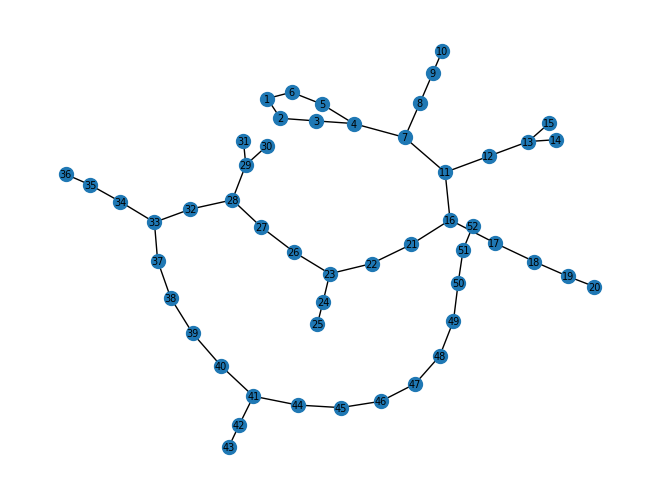

In [28]:
#!---------------------------- Calculating Closeness Centrality ----------------------------

centrality = nx.closeness_centrality(G)

degreeSorted = sorted(centrality, key=centrality.get, reverse=True) #ordenando por ordem decrescente

sortedCentrality = sorted((v, f"{c:0.3f}") for v, c in centrality.items())

print(str(degreeSorted[:5])) # todo; mostrando o top 5 mais importante 
print(sortedCentrality)
#!----------------------------   ----------------------------   ----------------------------

# Desenhar o grafo (1 à 52)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=7)
plt.show()

### Explicando Centralidade de Proximidade (Closeness Centrality)

Em 'Closeness Centrality' podemos observar que a importancia é os nós que podem se comunicar com o menor caminho em relação à todos os nós, ou seja, observando o top 5 ([26, 27, 23, 28, 22]) podemos ver que o nó 26 é o nó que pode percorrer o menor caminho em relação às extremidades (20, 52, 43, 1...)

